# Домашнее задание "Случайные марковские процессы"

***Задания:***  

I. Работа с главами произведения "Война и мир"
1. Скачать текст войны и мир; провести чистку текста, оставив только кириллицу и пробелы. 
2. Построить матрицу переходных вероятностей. 
3. Рассчитать вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р
4. При помощи матрицы переходных вероятностей сгенерировать слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

II. Работа с рядом авиалиний.  
1. Выбрать ряд из предыдущих домашних заданий по временным рядам и оценить его через HMM. 
2. Попробовать “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

### Работа с "Война и мир"

#### 1. Скачать текст войны и мир; провести чистку текста, оставив только кириллицу и пробелы.

Открываем файл, чистим его от французского языка и преобразуем в один текст:

In [2]:
toms_lst = []

for i in range(1,5):
    name = 'tom_{}'.format(i)
    with open ('tom_{}.txt'.format(i), 'r', encoding='utf-8') as text:
#         toms_lst[name] = text.read().lower()  # преобразуем всё в нижний регистр
#     toms_lst[name] = re.sub('[^а-я ]', '', toms_dict[name])  # оставляем только русские букввы и пробелы
        toms_lst.append((re.sub('[^а-я ]', '', text.read().lower())))
#     toms_lst = re.sub('[^а-я ]', '', toms_lst)

In [3]:
book = toms_lst[0] + toms_lst[1] + toms_lst[2] + toms_lst[3]  # объединим в одну болтшую строку
book[100:300]

'и миртом часть первая е              поместья                                                       мой верный раб    ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я '

#### 2. Построить матрицу переходных вероятностей.

In [4]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '   # соберем все возможные события, т.е. все буквы, что только есть в алфавите
POS = {l: i for i, l in enumerate(RUSSIAN)}   # создаем словарь позиций, т.е. кодируем цифрами наши символы

In [5]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))  # создадим матрицу вероятностей

Далее создаем 2 набора данных, чтобы получать как текущее, так и предыдущее значение:

In [6]:
for cp, cn in zip(book[:-1], book[1:]):
    probabilities[POS[cp], POS[cn]] += 1    # собираем частоты

In [7]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])   # считаем вероятность по строкам

Определяем матрицу вероятностей в датафрейм:

In [8]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))
df.head()

,а,б,в,г,д,е,ж,з,и,й,...,ч,ш,щ,ъ,ы,ь,э,ю,я,
а,0.000196,0.008748,0.047077,0.012012,0.027278,0.013674,0.016752,0.056727,0.001858,0.009130,...,0.010690,0.018371,0.003376,0.000000,0.000000,0.000000,0.000042,0.010887,0.034136,0.237949
б,0.065245,0.000600,0.005402,0.000675,0.001525,0.141918,0.000475,0.000050,0.048690,0.000000,...,0.001375,0.000300,0.013454,0.006777,0.272507,0.002501,0.000025,0.000275,0.029309,0.014904
в,0.138951,0.000432,0.001043,0.000977,0.007836,0.111638,0.000028,0.012524,0.078979,0.000000,...,0.001015,0.030019,0.000103,0.000338,0.063768,0.004134,0.000009,0.000019,0.005186,0.163295
г,0.056217,0.000000,0.002363,0.000066,0.062355,0.030714,0.000066,0.000088,0.043013,0.000000,...,0.001634,0.000420,0.000000,0.000000,0.000066,0.000110,0.000000,0.000199,0.000066,0.046744
д,0.165234,0.001248,0.037191,0.000298,0.001050,0.170894,0.000539,0.000099,0.095730,0.000014,...,0.001248,0.004695,0.000014,0.006553,0.023404,0.015262,0.000028,0.001645,0.016156,0.041844


Мы уже видим, что две буквы "а", находящиеся вместе - это крайне маловероятное событие, в то время как идущие подряд буквы "е" и "д" - довольно частое явление.  
Чтобы убедиться в верности выводов, построим тепловую карту:

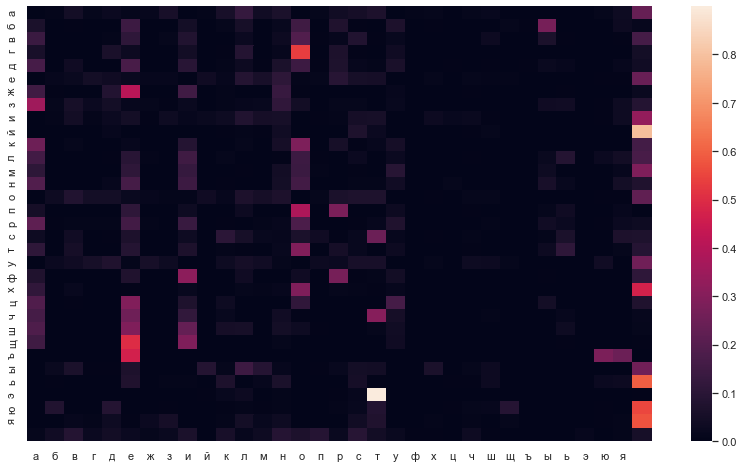

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Итак, больше всего у нас пробелов. Начнем с начала, но попробуем их не учитывать:

In [10]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))  
for cp, cn in zip(book[:-1], book[1:]):
    if cp == ' ' or cn == ' ':   # продолжаем, если натыкаемся на пробел
        continue
    else:
        probabilities[POS[cp], POS[cn]] += 1
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

<ipython-input-10-4f3c18b22196>:7: RuntimeWarning: invalid value encountered in true_divide
  probabilities = (probabilities / probabilities.sum(axis=1)[:, None])


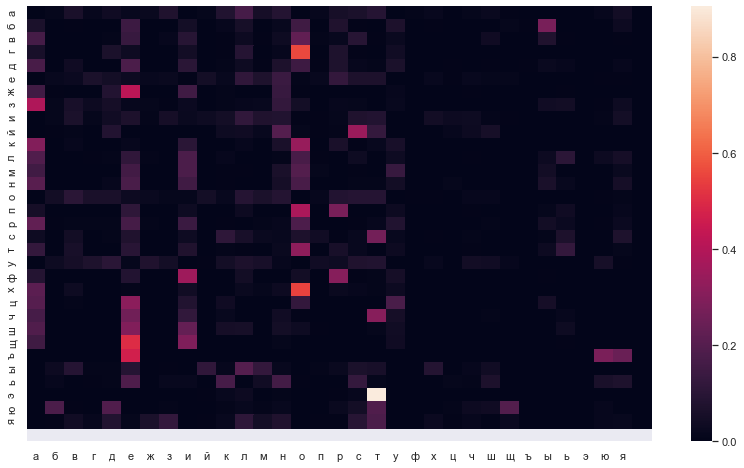

In [11]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Мы видим светлое пятно - перекрёстное значение букв "э" и "т". Действительно ли это так?

In [12]:
df['т'][-5:]

ь    0.011531
э    0.904633
ю    0.187530
я    0.179781
          NaN
Name: т, dtype: float64

Да, действительно. На порядок чаще обычного за буквой "э" следует "т". С другой стороны, по большей части в книге идет описание, а этому стилю свойственны местоимения типа "это", "этот", "эти"...  
Еще стоит отметить частоту использования гласных в целом, но в особенности "о", "е" и "а". Чаще обычного используется сочетания "за", "ще", "ъе", "же", "го", "хо", "по", "то" и пр.  
При этом буква "а" существенно проигрывает двум вышеобозначенным буквам по части её использования в книге.

#### 3. Рассчитать вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [13]:
dict_words = {}
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            dict_words[(''.join(['п', c1, c2, 'р']))] = proba

И теперь выведем топ-10 наиболее вероятных строк из 4-х символов, что начинаются на "п" и заканчиваются на "р":

In [14]:
from collections import Counter
dict(Counter(dict_words).most_common(10))

{'прер': 0.00016846010407216627,
 'прор': 0.0001255781228852244,
 'прар': 0.00010423567416806501,
 'потр': 6.167809065947597e-05,
 'попр': 5.502918478846122e-05,
 'погр': 5.353886429810788e-05,
 'подр': 5.2849993876569763e-05,
 'поер': 4.503931942284255e-05,
 'побр': 3.9632419827451784e-05,
 'пьер': 2.6111160836731904e-05}

Итак, наиболее вероятная строка - "прер". Любопытно, что на 10 месте угадывается имя одного из главных героев - Пьера Безухова.

И всё же какова вероятность в целом встретить такую строку?

In [15]:
sum(dict_words.values())

0.0012118872174548504

С учетом количества томов и строк в целом, вероятность довольно приличная.

####  4. При помощи матрицы переходных вероятностей сгенерировать слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [16]:
s = []
start = "б"
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бавотоман


Лексически слово ничем не противоречит русскому языку, поэтому в целом оно вполне могло бы существовать.

### Работа с рядом авиалиний.

Загрузим полюбившийся временной ряд - airlines:

In [17]:
airlines = pd.read_csv('international-airline-passengers.csv')
airlines

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


#### 1. Оценить временной ряд через HMM

In [18]:
import numpy as np
from hmmlearn.hmm import GaussianHMM

In [19]:
values = airlines.Count.values.reshape(-1,1)

Выберем оптимальное количество компонент:

In [20]:
for n in range(1, 15):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -893.1837902090575
2 -803.8479638762088
3 -767.0819417008183
4 -743.9977519551962
5 -731.3656167480517
6 -706.6072110851222
7 -694.9956025906147


Fitting a model with 167 free scalar parameters with only 144 data points will result in a degenerate solution.


8 -673.9336800691154
9 -664.2465557766134
10 -656.1684316480496
11 -650.2620800745826


Fitting a model with 194 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 144 data points will result in a degenerate solution.


12 -644.6127264353677
13 -639.3146088411693
14 -633.3865427285328


Возьмем 13 состояний, чтобы ряд был описан подробнее. Далее обучаем модель, используя 1000 итераций:

Fitting a model with 194 free scalar parameters with only 144 data points will result in a degenerate solution.


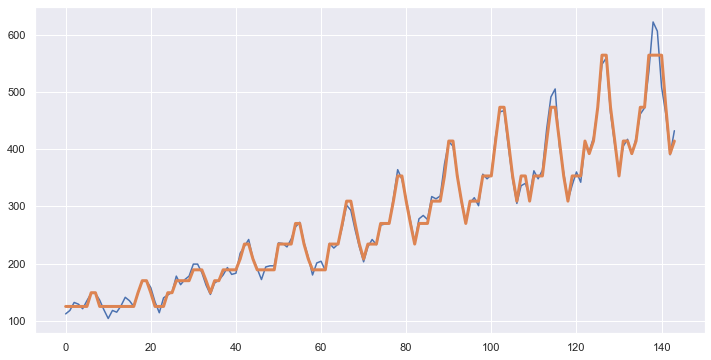

In [21]:
model = GaussianHMM(n_components=13,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

В целом временной ряд описан очень даже неплохо. Не угадано лишь начало графика и его конец. Промежуточные зачения совпадают довольно успешно.

Посмотрим, как определяется каждое из 13 состояний в зависимости от среднего на нашем временном ряде:

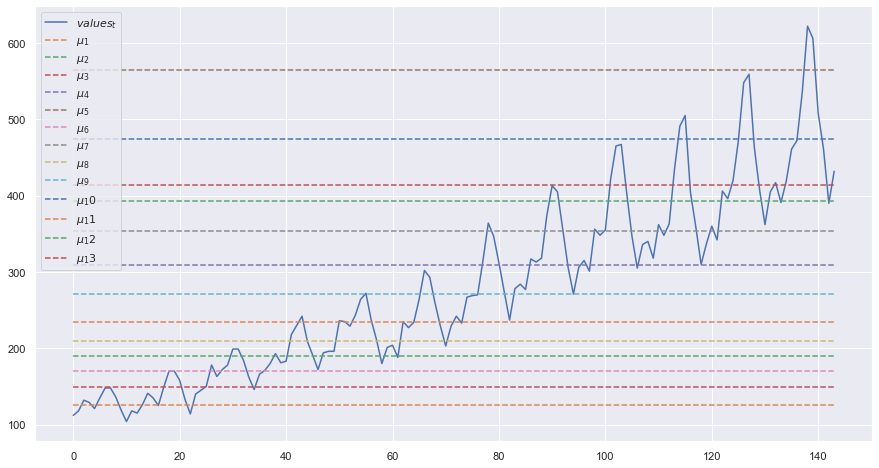

In [22]:
f, axs = plt.subplots(figsize=(15, 8))
_ = axs.plot(values, label='$values_t$')
for i in range(13):
    _ = axs.plot(range(len(values)), model.means_[i] * np.ones(len(values)), '--', label='$\mu_{}$'.format(i+1))
_ = axs.legend()

Теперь совершенно отчетливо видно, на каком этапе какое состояние не занулялось. Так, например, наиболее поздние даты (самый правая вершина графика) описывались $\mu_ {13}$, а начало графика (посмотрим в левый нижний угол) - $\mu_ {1}$.

#### 2. Попробуем “построить” (через среднее каждой компоненты) наивный прогноз ряда.

Используем матрицу перехода состояний, чтобы предположить, из какого состояния вероятнее всего построить наиболее точный прогноз:

In [23]:
expected_pass = np.dot(model.transmat_, model.means_)
expected_pass   # собственно матрица значений

array([[239.08347942],
       [414.47015174],
       [151.66724841],
       [319.9197257 ],
       [533.33103881],
       [170.64429605],
       [358.01051225],
       [209.7910165 ],
       [274.64964578],
       [465.38284533],
       [129.63805097],
       [195.62976986],
       [410.18891299]])

In [24]:
predict = []
lastN = 10
for idx in range(lastN):
    state_pred = labels[-lastN+idx]   # предсказываем возможное состояние на основе предыдущих наблюдений
    predict.append(expected_pass[state_pred])   # выбираем значение из матрицы по индексу состояния

print(predict)

[array([410.18891299]), array([465.38284533]), array([465.38284533]), array([533.33103881]), array([533.33103881]), array([533.33103881]), array([533.33103881]), array([465.38284533]), array([414.47015174]), array([410.18891299])]


И строим плот:

Text(0.5, 1.0, 'The Airlines Time Series and Passenger Traffic Prediction by HHM')

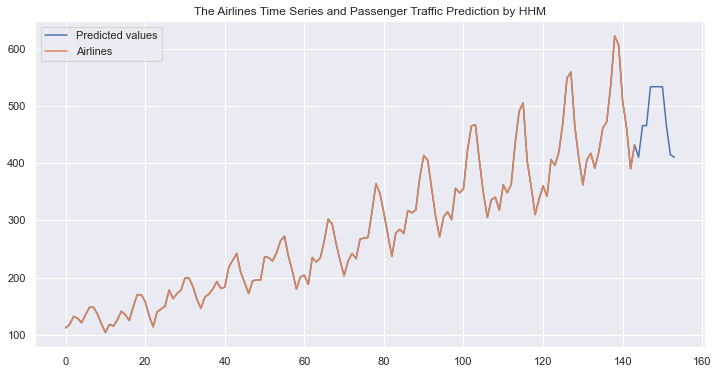

In [25]:
new_values = np.concatenate((values, np.array(predict)))

plt.figure(figsize=(12, 6))
plt.plot(new_values)
plt.plot(values)
plt.legend(['Predicted values', 'Airlines'])
plt.title("The Airlines Time Series and Passenger Traffic Prediction by HHM")

Прогноз получился действительно наивным, однако довольно предсказуемый визуально рост числа пассажиров (до плато) модель предсказала верно.

### Вывод

Данная работа делилась на 2 части.  

В первой части мы анализировали все 4 тома романа Л.Н.Толстого "Война и мир", а именно: работали с буквами, слогами и словами. По результатам проведенного анализа можно сделать вывод, что чаще всего в романе повторяются такие сочетания букв, как: "эт", "за", "ще", "го" и др. Также мы оценивали вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р. В целом такая вероятность оказалась довольно высокой, чтобы не брать ее в расчет. В финале работы с романом мы сгенерировали слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов. Получившееся слово формировалось при помощи матрицы переходных вероятностей, поэтому вполне могло бы существовать.  

Во второй части мы работали с временным рядом airlines. Посредством его оценки при помощи HМM было выявлено оптимальное количество состояний для описания ряда - 13. Увеличение состояний не на много улучшило работу предсказания модели, поэтому количество состояний 14+ в работу не вошли.  
На заключительном этапе работы было необходимо "построить" (через среднее каждой компоненты) наивный прогноз ряда. 
По завершении предсказания было выяснено, что на ближайшие 5-7 дней модель довольно успешно сделала прогноз. Последующий прогнозируемый период уже сложнее было брать в расчет, поскольку даже визуально данные казались недостоверными. В целом это неудивительно, поскольку еще при обучении модели было заметно, что последний сезон модель полностью предказать не смогла. Отсюда и скос в предсказании последующего периода. Таким образом можно сделать вывод, что для дальнейшего предсказания нужно выбрать один из двух вариантов действий:
- взять новые реальные данные (те 5-7 дней, которые были предсказаны), и, соответственно, на достоверных данных построить прогноз на те же 5-7 дней вперед
- выбрать для построения прогноза другую модель, которая бы учитывала мультипликативность сезонности.